In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade eli5 pdpbox

1.   **Import anything**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from eli5.sklearn import PermutationImportance
from pdpbox import pdp


import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
calltaxidata = '/content/drive/MyDrive/TEAM_ML/ML/DataSet/calltaxi.csv'
stationdata='/content/drive/MyDrive/TEAM_ML/ML/DataSet/chargestation.csv'
liveindata = '/content/drive/MyDrive/TEAM_ML/ML/DataSet/livein.csv'
schooldata = '/content/drive/MyDrive/TEAM_ML/ML/DataSet/school.csv'
csv1='/content/drive/MyDrive/TEAM_ML/ML/DataSet/data_file_csv.csv'
csv_final='/content/drive/MyDrive/TEAM_ML/ML/DataSet/data_file_csv_final.csv'

*   **학습, 검정, 테스트 데이터셋 준비**

In [ ]:
data = pd.read_csv(csv_final, encoding='utf-8')
data = data[['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2', 'endplus']]
train, test = train_test_split(data, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.25, random_state=1)
# feature Matrix, target vector 생성
target = 'endplus'
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# 확인
print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (1242, 6) (415, 6) (415, 6)
target vector:  (1242,) (415,) (415,)


2.   **Feature importance 파악하기**

*   **회귀 모델의 가장 간단한 기준값은 평균값으로 예측하는 것으로 모델평가 기준값을 아래와 같이 미리 구한다.**

In [ ]:
# 모두 평균으로 예측
y_pred = [y_train.mean()] * len(y_val)

# 결과 확인
print('MAE: ', mean_absolute_error(y_val, y_pred))

MAE:  41.63447218827022


In [ ]:
base_model = DecisionTreeRegressor(random_state=10)
ada_model = AdaBoostRegressor(
        estimator=base_model,
        n_estimators=1000,
        learning_rate=0.1)
# 파이프라인 생성 및 학습
pipe = make_pipeline(
    ada_model
)
pipe.fit(X_train, y_train)
# 예측
y_pred = pipe.predict(X_val)

# 결과 확인
print('MAE: ', mean_absolute_error(y_val, y_pred))

MAE:  28.897653695061596


In [ ]:
#x_names : x변수를 리스트화
x_names = ['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2']
# permuter 생성
permuter = PermutationImportance(
    pipe,
    scoring='neg_mean_absolute_error',
    n_iter=3,
    random_state=1)
# permutation importance 계산
permuter.fit(X_test, y_test)
# 결과 확인
feature_names = x_names
pd.Series(permuter.feature_importances_,
          feature_names).sort_values(ascending=False)

startplus          15.439072
startpos2           7.049713
end_destination     6.789574
startpos1           6.459655
hour                5.632173
receipt-ride        3.352089
dtype: float64

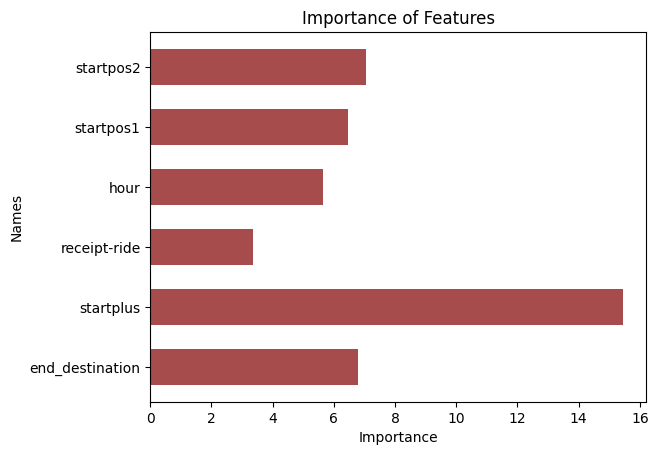

In [ ]:
plt.rc('font', family='sans-serif')
plt.barh(feature_names, permuter.feature_importances_,
        color='maroon', height = 0.6, align='center', alpha = 0.7)
plt.title('Importance of Features')
plt.ylabel('Names')
plt.xlabel('Importance')
plt.show()

*   **pdpbox의 최신버전에서 기존방식으로 PDP를 진행할 수 없게 되어 기존코드는 삭제하였습니다.**